In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df['person_gender'].replace({'male':1,'female':0},inplace = True)

In [5]:
df['previous_loan_defaults_on_file'].replace({'No':1,'Yes':0},inplace = True)

In [6]:
df1 = pd.get_dummies(df,dtype = int)
df1

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6,15000.0,15.66,0.31,3.0,645,1,...,0,0,0,1,0,0,0,1,0,0
44996,37.0,0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,...,0,0,0,1,0,0,1,0,0,0
44997,33.0,1,56942.0,7,2771.0,10.02,0.05,10.0,668,1,...,0,0,0,1,1,0,0,0,0,0
44998,29.0,1,33164.0,4,12000.0,13.23,0.36,6.0,604,1,...,0,0,0,1,0,1,0,0,0,0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   loan_amnt                       45000 non-null  float64
 5   loan_int_rate                   45000 non-null  float64
 6   loan_percent_income             45000 non-null  float64
 7   cb_person_cred_hist_length      45000 non-null  float64
 8   credit_score                    45000 non-null  int64  
 9   previous_loan_defaults_on_file  45000 non-null  int64  
 10  loan_status                     45000 non-null  int64  
 11  person_education_Associate      45000 non-null  int64  
 12  person_education_Bachelor       

In [9]:
num_cols = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']

import matplotlib.pyplot as plt
import seaborn as sns

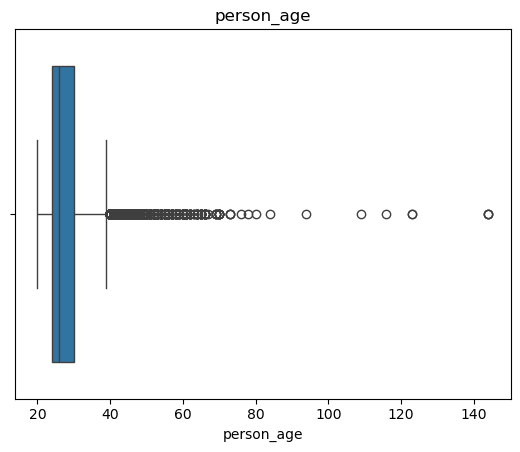

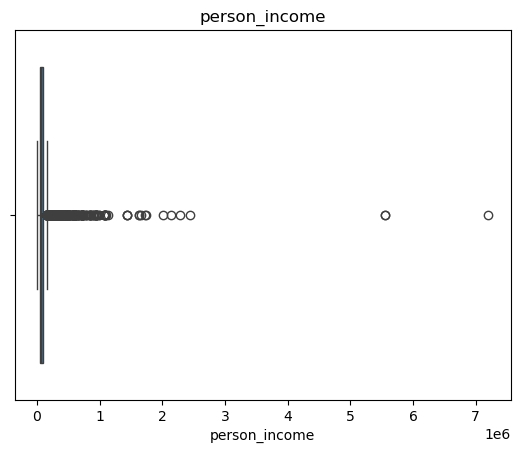

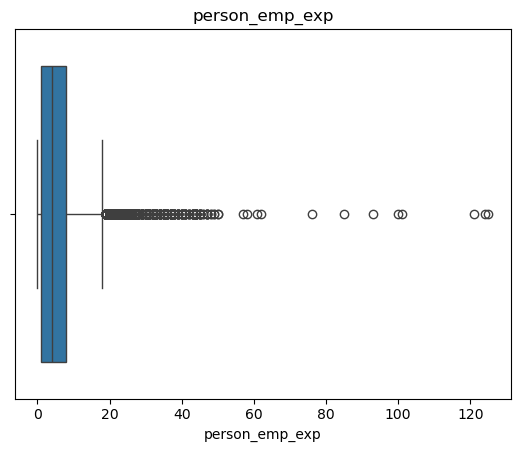

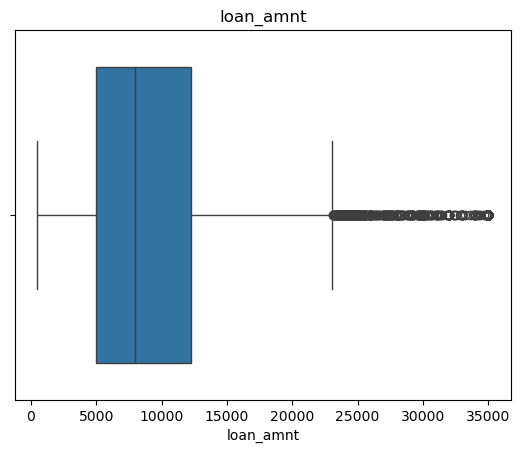

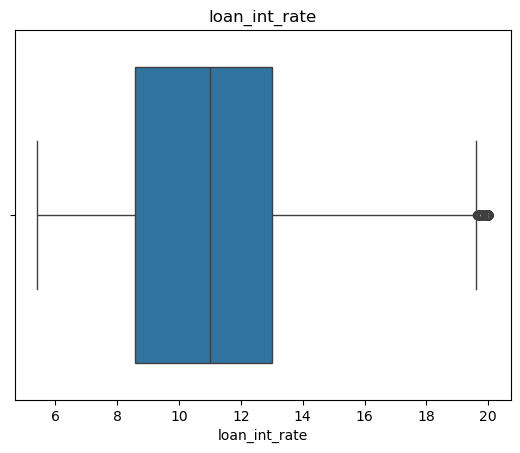

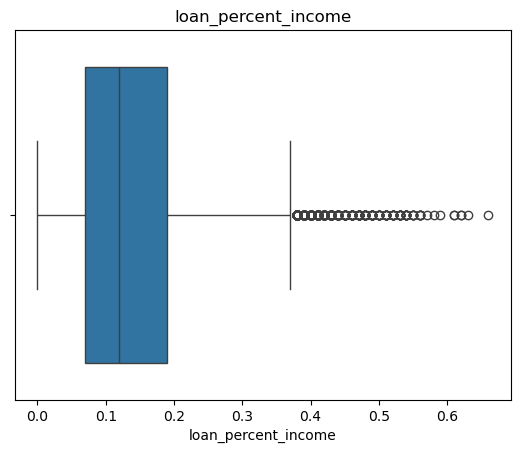

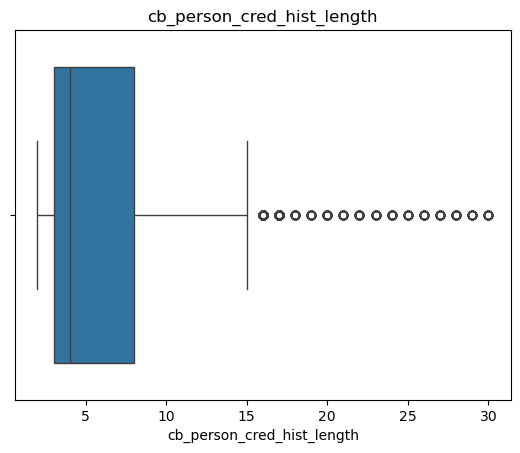

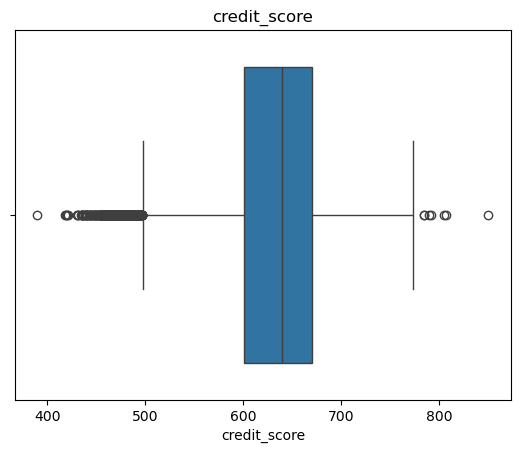

In [10]:
for col in num_cols:
    sns.boxplot(x = df1[col])
    plt.title(col)
    plt.show()

In [11]:
df1 = df1[(df1['person_age'] >=18) & (df1['person_age']<=100)]

In [12]:
df1 = df1[(df1['credit_score']>300) & (df1['credit_score']<=850)]

In [14]:
df1 = df1[df1['person_emp_exp']<=(df1['person_age']-18)]
df1

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6,15000.0,15.66,0.31,3.0,645,1,...,0,0,0,1,0,0,0,1,0,0
44996,37.0,0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,...,0,0,0,1,0,0,1,0,0,0
44997,33.0,1,56942.0,7,2771.0,10.02,0.05,10.0,668,1,...,0,0,0,1,1,0,0,0,0,0
44998,29.0,1,33164.0,4,12000.0,13.23,0.36,6.0,604,1,...,0,0,0,1,0,1,0,0,0,0


In [16]:
def cap_outliers_iqr(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = df[col].clip(lower,upper)
    return df

In [21]:
cap_cols = ['person_income','loan_amnt','loan_percent_income','cb_person_cred_hist_length']
for col in cap_cols:
    df = cap_outliers_iqr(df1,col)

In [22]:
df1['loan_int_rate'] = df1['loan_int_rate'].clip(
    df1['loan_int_rate'].quantile(0.01),
    df1['loan_int_rate'].quantile(0.99)
)


In [24]:
log_cols = ['person_income','loan_amnt']
for col in log_cols:
    df1[col] = np.log1p(df1[col])

In [25]:
df1

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,2.500100,0,2.402187,16.02,0.37,3.0,561,1,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,2.343340,0,2.067970,11.14,0.08,2.0,504,0,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,2.344551,3,2.263084,12.87,0.37,3.0,635,1,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,2.508518,0,2.402187,15.23,0.37,2.0,675,1,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,2.493162,1,2.402187,14.27,0.37,4.0,586,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2.466265,6,2.362350,15.66,0.31,3.0,645,1,...,0,0,0,1,0,0,0,1,0,0
44996,37.0,0,2.492742,17,2.313039,14.07,0.14,11.0,621,1,...,0,0,0,1,0,0,1,0,0,0
44997,33.0,1,2.480715,7,2.189117,10.02,0.05,10.0,668,1,...,0,0,0,1,1,0,0,0,0,0
44998,29.0,1,2.434424,4,2.341108,13.23,0.36,6.0,604,1,...,0,0,0,1,0,1,0,0,0,0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_gender                   44993 non-null  int64  
 2   person_income                   44993 non-null  float64
 3   person_emp_exp                  44993 non-null  int64  
 4   loan_amnt                       44993 non-null  float64
 5   loan_int_rate                   44993 non-null  float64
 6   loan_percent_income             44993 non-null  float64
 7   cb_person_cred_hist_length      44993 non-null  float64
 8   credit_score                    44993 non-null  int64  
 9   previous_loan_defaults_on_file  44993 non-null  int64  
 10  loan_status                     44993 non-null  int64  
 11  person_education_Associate      44993 non-null  int64  
 12  person_education_Bachelor       44993

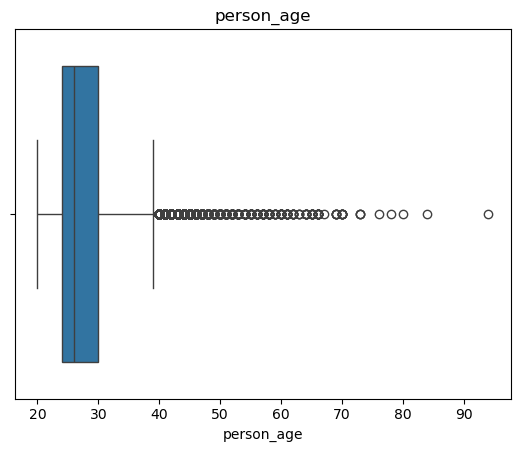

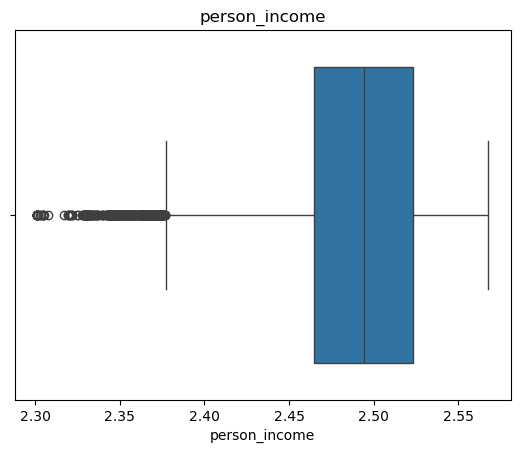

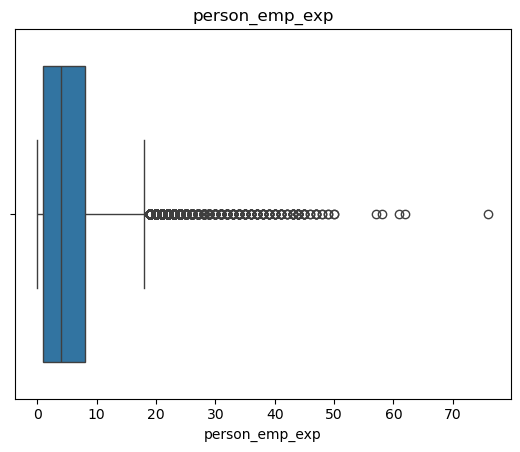

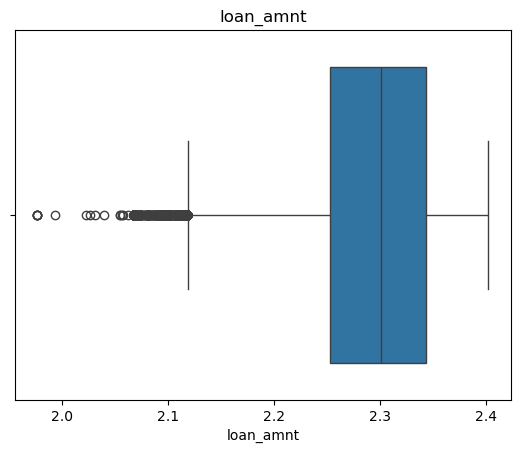

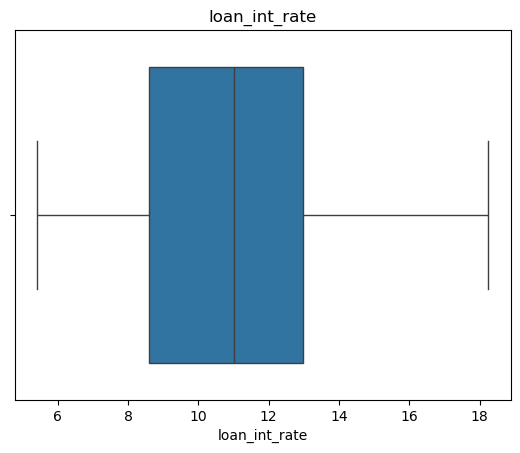

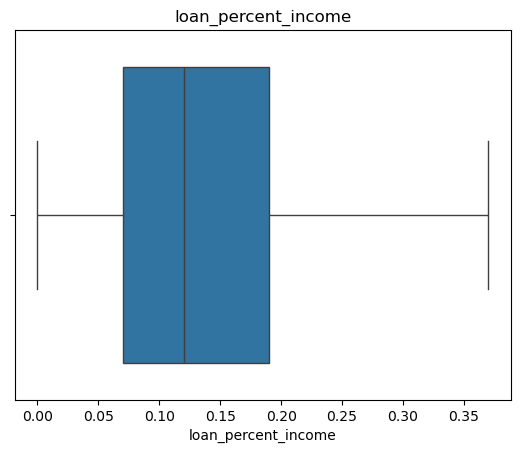

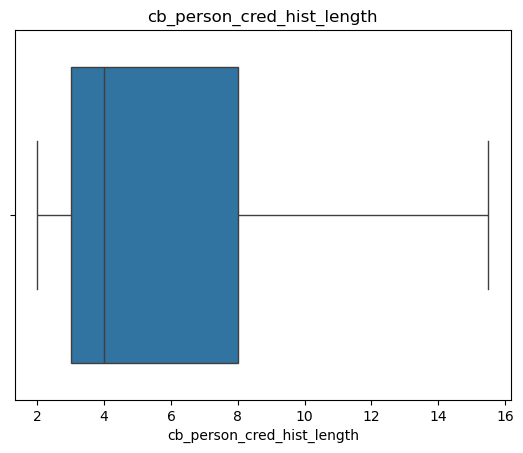

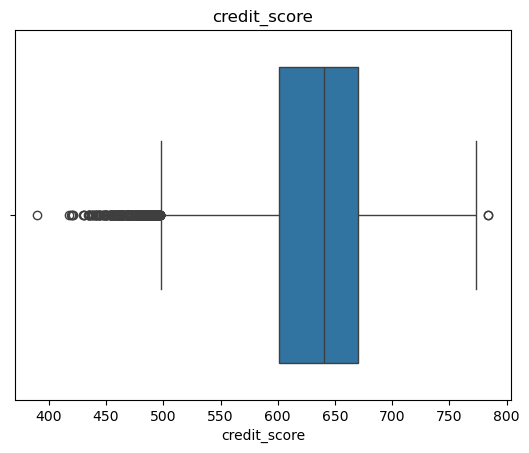

In [27]:
num_cols = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
for col in num_cols:
    sns.boxplot(x = df1[col])
    plt.title(col)
    plt.show()
    

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_gender                   44993 non-null  int64  
 2   person_income                   44993 non-null  float64
 3   person_emp_exp                  44993 non-null  int64  
 4   loan_amnt                       44993 non-null  float64
 5   loan_int_rate                   44993 non-null  float64
 6   loan_percent_income             44993 non-null  float64
 7   cb_person_cred_hist_length      44993 non-null  float64
 8   credit_score                    44993 non-null  int64  
 9   previous_loan_defaults_on_file  44993 non-null  int64  
 10  loan_status                     44993 non-null  int64  
 11  person_education_Associate      44993 non-null  int64  
 12  person_education_Bachelor       44993

In [29]:
x = df1.drop(['loan_status'],axis =1)
y = df1['loan_status']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size = 0.2,stratify=y)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred_train = log_reg.predict(x_train)
con_matrix = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_train,y_pred_train)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_train,y_pred_train)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[25556  2438]
 [ 2709  5291]]
The accuracy score : 0.8570039451019614
The classification report :
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     27994
           1       0.68      0.66      0.67      8000

    accuracy                           0.86     35994
   macro avg       0.79      0.79      0.79     35994
weighted avg       0.86      0.86      0.86     35994



In [37]:
y_pred = log_reg.predict(x_test)
con_matrix = confusion_matrix(y_test,y_pred)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,y_pred)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[6345  654]
 [ 698 1302]]
The accuracy score : 0.8497610845649517
The classification report :
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      6999
           1       0.67      0.65      0.66      2000

    accuracy                           0.85      8999
   macro avg       0.78      0.78      0.78      8999
weighted avg       0.85      0.85      0.85      8999



In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
normaler = StandardScaler()
array1 = normaler.fit_transform(x)
df = pd.DataFrame(array1,columns=x.columns)
df

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.972715,-1.110013,0.168884,-0.910147,1.507426,1.698951,2.740221,-0.777886,-1.420299,1.016110,...,-0.835067,-0.051061,-0.264937,0.958904,-0.43449,-0.505287,-0.344892,-0.484299,2.226780,-0.458481
1,-1.141929,-1.110013,-3.460505,-0.910147,-3.126273,0.048094,-0.697704,-1.057369,-2.551210,-0.984145,...,-0.835067,-0.051061,3.774480,-1.042857,-0.43449,1.979073,-0.344892,-0.484299,-0.449079,-0.458481
2,-0.465073,-1.110013,-3.432469,-0.403997,-0.421150,0.633336,2.740221,-0.777886,0.047901,1.016110,...,1.197509,-0.051061,-0.264937,-1.042857,-0.43449,-0.505287,-0.344892,2.064842,-0.449079,-0.458481
3,-0.803501,-1.110013,0.363771,-0.910147,1.507426,1.431702,2.740221,-1.057369,0.841522,1.016110,...,-0.835067,-0.051061,-0.264937,0.958904,-0.43449,-0.505287,-0.344892,2.064842,-0.449079,-0.458481
4,-0.634287,0.900891,0.008240,-0.741431,1.507426,1.106943,2.740221,-0.498404,-0.924286,1.016110,...,-0.835067,-0.051061,-0.264937,0.958904,-0.43449,-0.505287,-0.344892,2.064842,-0.449079,-0.458481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,-0.126645,0.900891,-0.614483,0.102153,0.955120,1.577166,2.028926,-0.777886,0.246306,1.016110,...,-0.835067,-0.051061,-0.264937,0.958904,-0.43449,-0.505287,-0.344892,2.064842,-0.449079,-0.458481
44989,1.565497,-1.110013,-0.001480,1.958038,0.271455,1.039285,0.013590,1.457973,-0.229867,1.016110,...,-0.835067,-0.051061,-0.264937,0.958904,-0.43449,-0.505287,2.899458,-0.484299,-0.449079,-0.458481
44990,0.888640,0.900891,-0.279928,0.270870,-1.446654,-0.330791,-1.053352,1.178490,0.702639,1.016110,...,-0.835067,-0.051061,-0.264937,0.958904,2.30155,-0.505287,-0.344892,-0.484299,-0.449079,-0.458481
44991,0.211784,0.900891,-1.351674,-0.235280,0.660609,0.755121,2.621671,0.060561,-0.567156,1.016110,...,-0.835067,-0.051061,-0.264937,0.958904,-0.43449,1.979073,-0.344892,-0.484299,-0.449079,-0.458481


In [40]:
x_train,x_test,y_train,y_test = train_test_split(df,y,random_state=42,test_size = 0.2,stratify=y)

In [41]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred_train = log_reg.predict(x_train)
con_matrix = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_train,y_pred_train)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_train,y_pred_train)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[26298  1696]
 [ 1917  6083]]
The accuracy score : 0.8996221592487637
The classification report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     27994
           1       0.78      0.76      0.77      8000

    accuracy                           0.90     35994
   macro avg       0.86      0.85      0.85     35994
weighted avg       0.90      0.90      0.90     35994



In [43]:
y_pred = log_reg.predict(x_test)
con_matrix = confusion_matrix(y_test,y_pred)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,y_pred)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[6568  431]
 [ 472 1528]]
The accuracy score : 0.8996555172796977
The classification report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      6999
           1       0.78      0.76      0.77      2000

    accuracy                           0.90      8999
   macro avg       0.86      0.85      0.85      8999
weighted avg       0.90      0.90      0.90      8999



In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


np.float64(0.8512098871267324)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn_clf = KNeighborsClassifier(n_neighbors=4,p=5)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, p=5)

In [52]:
y_pred_train = knn_clf.predict(x_train)
con_matrix = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_train,y_pred_train)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_train,y_pred_train)
print("The classification report :\n",clf_rpt)


The confusion matrix :
 [[27640   354]
 [ 2417  5583]]
The accuracy score : 0.9230149469356004
The classification report :
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     27994
           1       0.94      0.70      0.80      8000

    accuracy                           0.92     35994
   macro avg       0.93      0.84      0.88     35994
weighted avg       0.92      0.92      0.92     35994



In [53]:
y_pred = knn_clf.predict(x_test)
con_matrix = confusion_matrix(y_test,y_pred)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,y_pred)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[6788  211]
 [ 779 1221]]
The accuracy score : 0.8899877764196021
The classification report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6999
           1       0.85      0.61      0.71      2000

    accuracy                           0.89      8999
   macro avg       0.87      0.79      0.82      8999
weighted avg       0.89      0.89      0.88      8999



In [50]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred_train = dt_clf.predict(x_train)
con_matrix = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_train,y_pred_train)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_train,y_pred_train)
print("The classification report :\n",clf_rpt)


The confusion matrix :
 [[27994     0]
 [    0  8000]]
The accuracy score : 1.0
The classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27994
           1       1.00      1.00      1.00      8000

    accuracy                           1.00     35994
   macro avg       1.00      1.00      1.00     35994
weighted avg       1.00      1.00      1.00     35994



In [56]:
y_pred = dt_clf.predict(x_test)
con_matrix = confusion_matrix(y_test,y_pred)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,y_pred)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[6465  534]
 [ 438 1562]]
The accuracy score : 0.8919879986665185
The classification report :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      6999
           1       0.75      0.78      0.76      2000

    accuracy                           0.89      8999
   macro avg       0.84      0.85      0.85      8999
weighted avg       0.89      0.89      0.89      8999



In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
dt_model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
hyp_grid = {'criterion':['gini','entropy'],
            'max_depth':[None,5,10,15,20],
            'min_samples_split':[2,5,10,20],
            'min_samples_leaf':[1,2,5,10]}

gscv_dt_model = GridSearchCV(dt_model,param_grid=hyp_grid,cv = 3,n_jobs=-1)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]})

In [59]:
best_model = gscv_dt_model.best_estimator_
best_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [69]:
y_pred_train = best_model.predict(x_train)
con_matrix = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_train,y_pred_train)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_train,y_pred_train)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[27994     0]
 [    0  8000]]
The accuracy score : 1.0
The classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27994
           1       1.00      1.00      1.00      8000

    accuracy                           1.00     35994
   macro avg       1.00      1.00      1.00     35994
weighted avg       1.00      1.00      1.00     35994



In [70]:
y_pred = best_model.predict(x_test)
con_matrix = confusion_matrix(y_test,y_pred)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,y_pred)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[6532  467]
 [ 450 1550]]
The accuracy score : 0.8980997888654295
The classification report :
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      6999
           1       0.77      0.78      0.77      2000

    accuracy                           0.90      8999
   macro avg       0.85      0.85      0.85      8999
weighted avg       0.90      0.90      0.90      8999



In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_clf = RandomForestClassifier(random_state=42,n_jobs=-1)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [67]:
y_pred_train = rf_clf.predict(x_train)
con_matrix = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_train,y_pred_train)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_train,y_pred_train)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[25634  2360]
 [  454  7546]]
The accuracy score : 0.9218203033838973
The classification report :
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     27994
           1       0.76      0.94      0.84      8000

    accuracy                           0.92     35994
   macro avg       0.87      0.93      0.90     35994
weighted avg       0.93      0.92      0.92     35994



In [68]:
y_pred = rf_clf.predict(x_test)
con_matrix = confusion_matrix(y_test,y_pred)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,y_pred)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[6291  708]
 [ 207 1793]]
The accuracy score : 0.8983220357817535
The classification report :
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      6999
           1       0.72      0.90      0.80      2000

    accuracy                           0.90      8999
   macro avg       0.84      0.90      0.86      8999
weighted avg       0.91      0.90      0.90      8999



In [66]:
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [71]:
y_pred_train = rf_clf.predict(x_train)
con_matrix = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_train,y_pred_train)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_train,y_pred_train)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[25634  2360]
 [  454  7546]]
The accuracy score : 0.9218203033838973
The classification report :
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     27994
           1       0.76      0.94      0.84      8000

    accuracy                           0.92     35994
   macro avg       0.87      0.93      0.90     35994
weighted avg       0.93      0.92      0.92     35994



In [72]:
y_pred = rf_clf.predict(x_test)
con_matrix = confusion_matrix(y_test,y_pred)
print("The confusion matrix :\n",con_matrix)
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score :",acc_score)
clf_rpt = classification_report(y_test,y_pred)
print("The classification report :\n",clf_rpt)

The confusion matrix :
 [[6291  708]
 [ 207 1793]]
The accuracy score : 0.8983220357817535
The classification report :
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      6999
           1       0.72      0.90      0.80      2000

    accuracy                           0.90      8999
   macro avg       0.84      0.90      0.86      8999
weighted avg       0.91      0.90      0.90      8999



In [73]:
import joblib

joblib.dump(rf_clf, "random_forest_credit_risk_default.pkl")


['random_forest_credit_risk_default.pkl']

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_gender                   44993 non-null  int64  
 2   person_income                   44993 non-null  float64
 3   person_emp_exp                  44993 non-null  int64  
 4   loan_amnt                       44993 non-null  float64
 5   loan_int_rate                   44993 non-null  float64
 6   loan_percent_income             44993 non-null  float64
 7   cb_person_cred_hist_length      44993 non-null  float64
 8   credit_score                    44993 non-null  int64  
 9   previous_loan_defaults_on_file  44993 non-null  int64  
 10  loan_status                     44993 non-null  int64  
 11  person_education_Associate      44993 non-null  int64  
 12  person_education_Bachelor       44993